In [44]:
%matplotlib inline

In [56]:
import h5py
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.signal
from datetime import datetime
import pytz
import os

In [57]:
files = os.listdir()
fname = [x for x in files if '.h5' in x][0]
time_nano = fname.split('_')[0]

In [58]:
#Taking all 19 digits instead of 18.
time_sec = float(time_nano)/(10**9) 
datetimeob_utc = datetime.utcfromtimestamp(time_sec)
print("TIME-UTC",datetimeob_utc)

TIME-UTC 2018-11-11 18:48:28.935000


In [59]:
timezone_cern = pytz.timezone('Europe/Zurich')
datetimeob_cern = pytz.utc.localize(datetimeob_utc, is_dst=None).astimezone(timezone_cern)
print("CERN-TIMEZONE(UTC+1)", datetimeob_cern)

CERN-TIMEZONE(UTC+1) 2018-11-11 19:48:28.935000+01:00


In [80]:
#Task2
file_main = h5py.File(fname, 'r')
info_dataframe = pd.DataFrame()
info_list = []

In [81]:
def check_function(name, node):
    if isinstance(node, h5py.Dataset):
        try:
            temp = [str(node.name), 'Dataset', node.shape, node.size, str(node.dtype)]
            info_list.append(temp)
        except TypeError:
             temp = [str(node.name),'Dataset', node.shape, node.size, "Error"]
             info_list.append(temp)
    else:
        temp = [str(node.name),'Group', np.nan, np.nan, np.nan]
        info_list.append(temp)

In [82]:
file_main.visititems(check_function)
info_dataframe = info_dataframe.append(info_list)
info_dataframe.rename(columns = {0: 'Name',1: 'Type',2: 'Shape' ,3: 'Size', 4:'DataType'}, inplace = True)
info_dataframe.to_csv('Task2.csv', index = False)

In [83]:
#Reshaping
image_1d = np.array(file_main.get('AwakeEventData/XMPP-STREAK/StreakImage/streakImageData'))
height = list(file_main.get('AwakeEventData/XMPP-STREAK/StreakImage/streakImageHeight'))[0]
width = list(file_main.get('AwakeEventData/XMPP-STREAK/StreakImage/streakImageWidth'))[0]
image_final = np.reshape(image_1d, (height,width))

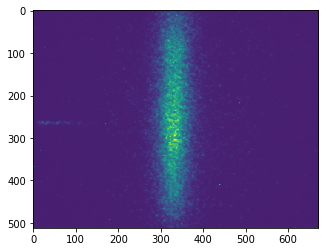

In [84]:
image_final_processed = scipy.signal.medfilt(image_final)
plt.imshow(image_final_processed)

In [85]:
plt.imsave('Task3.png', image_final_processed)